# EDA (Pokemon dataset)
***
## Set up

In [5]:
import os
import datetime
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, model_selection, metrics
import copy

from sklearn.preprocessing import OrdinalEncoder

In [6]:
local_path = 'data/clustering/'

path = local_path

# For test train files
df = pd.read_csv(path+'pokedex_(Update_05.20).csv',  index_col=0)

## EDA

### AutoEDA

In [7]:
#rom pandas_profiling import ProfileReport
#rofileReport(df)

#from dataprep.eda import create_report
#create_report(df)

#import sweetviz as sv
#sv_report = sv.analyze(df)
#sv_report.show_notebook()

#import dtale
#import dtale.app as dtale_app
#dtale_app.USE_NGROK = True
#d_tale = dtale.show(df)
#d_tale.main_url()

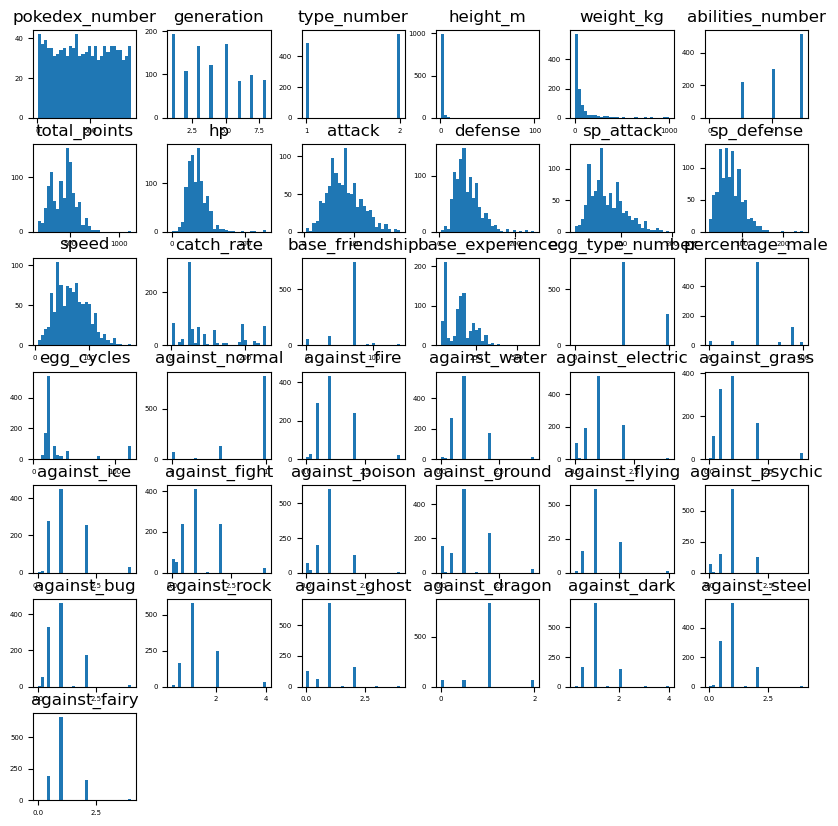

In [8]:
# Histograms
df.hist(figsize=(10,10), grid=False, ylabelsize=5, xlabelsize=5, bins=30)
plt.show()

In [9]:
# Checking for non numeric data

non_numeric_columns = list(df.select_dtypes(exclude=[np.number]).columns)
print(non_numeric_columns)

['name', 'german_name', 'japanese_name', 'status', 'species', 'type_1', 'type_2', 'ability_1', 'ability_2', 'ability_hidden', 'growth_rate', 'egg_type_1', 'egg_type_2']


In [10]:
df.describe().style.background_gradient(cmap="Pastel1")

,pokedex_number,generation,type_number,height_m,weight_kg,abilities_number,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,egg_type_number,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
count,1028.000000,1028.000000,1028.000000,1028.000000,1027.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,924.000000,924.000000,924.000000,1028.000000,792.000000,1027.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,437.711089,4.034047,1.527237,1.368093,69.753749,2.284047,437.571984,69.577821,80.119650,74.475681,72.732490,72.132296,68.534047,93.172078,64.139610,153.814935,1.271401,55.003157,30.316456,0.868434,1.125486,1.053502,1.034290,1.004134,1.196498,1.078794,0.952335,1.084630,1.166342,0.979329,0.992461,1.239786,1.010700,0.975681,1.065661,0.980302,1.084874
std,259.366480,2.234937,0.499501,3.380126,129.221230,0.794981,121.664910,26.385849,32.372321,31.303309,32.677698,28.083684,29.802103,75.240630,21.455464,79.270628,0.451417,20.182675,28.942912,0.286236,0.717742,0.613411,0.645167,0.748527,0.759471,0.754969,0.542982,0.784937,0.593030,0.499146,0.598301,0.699156,0.558533,0.377549,0.451054,0.503434,0.527743
min,1.000000,1.000000,1.000000,0.100000,0.100000,0.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,3.000000,0.000000,36.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000
25%,213.750000,2.000000,1.000000,0.600000,8.800000,2.000000,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,45.000000,70.000000,67.000000,1.000000,50.000000,20.000000,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000
50%,433.500000,4.000000,2.000000,1.000000,28.500000,2.000000,455.000000,66.500000,76.000000,70.000000,65.000000,70.000000,65.000000,60.000000,70.000000,159.000000,1.000000,50.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,663.250000,6.000000,2.000000,1.500000,69.100000,3.000000,510.000000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,127.000000,70.000000,201.500000,2.000000,50.000000,25.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.625000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,890.000000,8.000000,2.000000,100.000000,999.900000,3.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,180.000000,255.000000,140.000000,608.000000,2.000000,100.000000,120.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000


<AxesSubplot: >

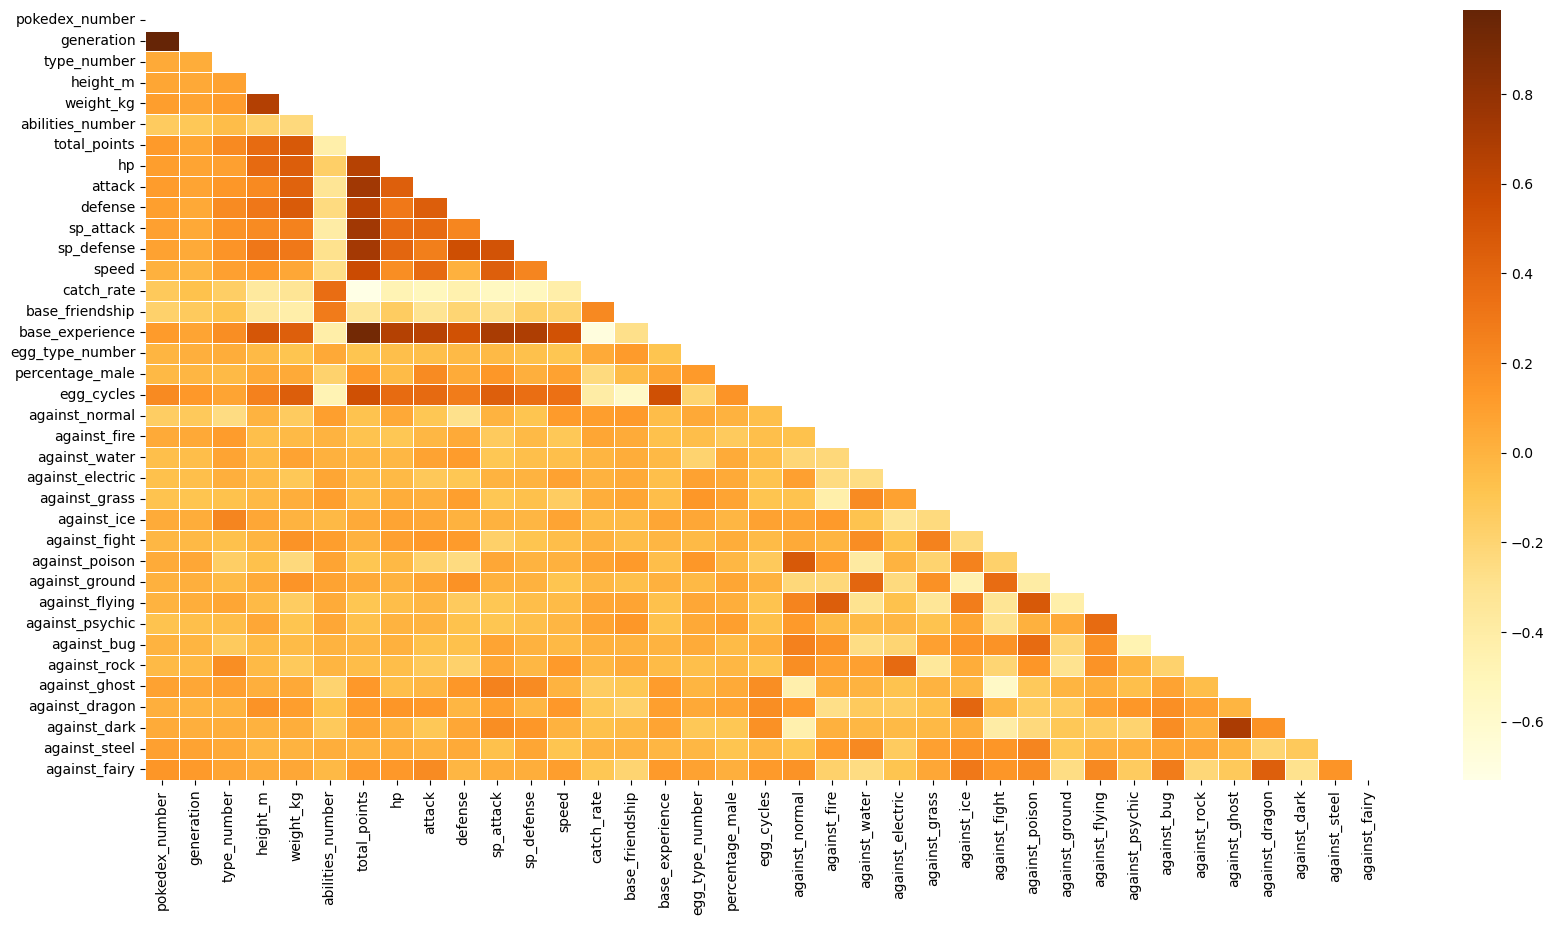

In [11]:
# Corrilation heatmap

corr = df.corr(numeric_only=True)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f,ax =plt.subplots(figsize=(20,10))
sns.heatmap(corr, linewidths=.5, ax=ax, mask=mask, cmap="YlOrBr")

In [14]:
# Check colineality 

import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [15]:
checkVIF(df[df.describe().columns])

MissingDataError: exog contains inf or nans